In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


# 한글 폰트 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False  

# 데이터 불러오기

In [37]:
data_path = './data/한국관광 데이터랩/방문자수추이'
region_list = os.listdir(data_path)
region_list.sort()
region_list.pop(0)
print(region_list)

['세종', '강원', '경기도', '경상남도', '경상북도', '광주', '대구', '대전', '부산', '서울', '울산', '인천', '전국', '전라남도', '전라북도', '제주', '충청남도', '충청북도']


In [3]:
data_list = dict()
for region in region_list:
    data_list[region] = {'방문자수':[], '거주지':[], '성연령':[]}
    
data_list['전국'] = {'방문자수':[]}
data_list

{'세종': {'방문자수': [], '거주지': [], '성연령': []},
 '강원': {'방문자수': [], '거주지': [], '성연령': []},
 '경기도': {'방문자수': [], '거주지': [], '성연령': []},
 '경상남도': {'방문자수': [], '거주지': [], '성연령': []},
 '경상북도': {'방문자수': [], '거주지': [], '성연령': []},
 '광주': {'방문자수': [], '거주지': [], '성연령': []},
 '대구': {'방문자수': [], '거주지': [], '성연령': []},
 '대전': {'방문자수': [], '거주지': [], '성연령': []},
 '부산': {'방문자수': [], '거주지': [], '성연령': []},
 '서울': {'방문자수': [], '거주지': [], '성연령': []},
 '울산': {'방문자수': [], '거주지': [], '성연령': []},
 '인천': {'방문자수': [], '거주지': [], '성연령': []},
 '전국': {'방문자수': []},
 '전라남도': {'방문자수': [], '거주지': [], '성연령': []},
 '전라북도': {'방문자수': [], '거주지': [], '성연령': []},
 '제주': {'방문자수': [], '거주지': [], '성연령': []},
 '충청남도': {'방문자수': [], '거주지': [], '성연령': []},
 '충청북도': {'방문자수': [], '거주지': [], '성연령': []}}

In [4]:
for region in region_list:
    region_path_list = os.listdir(data_path+f'/{region}')
    region_path_list.sort()
    region_path_list.pop(0)
    if region == '전국':
        for path in region_path_list:
            df_tmp = pd.read_csv(data_path+f'/{region}/{path}', encoding='cp949')
            data_list[region]['방문자수'].append(df_tmp)
    else :    
        for i in range(15):
            path = region_path_list[i]
            df_tmp = pd.read_csv(data_path+f'/{region}/{path}', encoding='cp949')

            if i % 3 == 0:
                data_list[region]['방문자수'].append(df_tmp)
            elif i % 3 == 1:
                data_list[region]['거주지'].append(df_tmp)
            else :
                data_list[region]['성연령'].append(df_tmp)

In [5]:
data_list['전국']['방문자수'][0]

,기준연월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,201901,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,201902,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,201903,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,201904,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,201905,24476.0,23903.0,2.4,3621.0,3610.0,0.3
5,201906,23472.0,21938.0,7.0,3419.0,3415.0,0.1
6,201907,26799.0,24455.0,9.6,3366.0,3516.0,-4.2
7,201908,29920.0,25096.0,19.2,3559.0,3514.0,1.3
8,201909,27570.0,26935.0,2.4,3236.0,3511.0,-7.8
9,201910,25997.0,23898.0,8.8,3484.0,3531.0,-1.3


In [6]:
data_list['전라남도']['성연령'][0]

,방문자 연령,방문자 비율(남성),방문자 비율(여성)
0,70세 이상,2.6,2.9
1,60~69세,6.6,5.0
2,50~59세,12.3,9.4
3,40~49세,11.3,7.5
4,30~39세,9.0,6.4
5,20~29세,10.3,7.4
6,10~19세,4.2,3.5
7,0~9세,0.8,0.9


In [7]:
data_list['대구']['방문자수'][0]

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,201901,8527814.0,8446098.0,1.0
1,201902,9399775.0,8851573.0,6.2
2,201903,10155206.0,9481876.0,7.1
3,201904,7892780.0,7891776.0,0.0
4,201905,8554829.0,8989406.0,-4.8
5,201906,7851284.0,7952839.0,-1.3
6,201907,9650023.0,8758162.0,10.2
7,201908,9172727.0,8756040.0,4.8
8,201909,9856347.0,10102428.0,-2.4
9,201910,8551479.0,8378843.0,2.1


In [8]:
data_list['대구']['거주지'][0]

,광역지자체명,기초지자체명,기초지자체별 거주 방문자 수
0,경상북도,경산시,17903896.0
1,경상북도,구미시,6464773.0
2,경상북도,칠곡군,3624548.0
3,경상북도,영천시,2419704.0
4,경상북도,경주시,2387805.0
...,...,...,...
236,광주광역시,광산구,195380.0
237,광주광역시,서구,133651.0
238,광주광역시,남구,81246.0
239,광주광역시,동구,54498.0


# 전처리

## 기준년월 datetime 형식으로 변환
- 전국: 기준연월
- 전국 이외: 기준년월
- feature 이름을 통일해준다.

In [9]:
# feature 통일 : 기준연월 -> 기준년월

for data in data_list['전국']['방문자수']:
    data.columns = ['기준년월', '방문자수', '전년동기 방문자수', '방문자수 증감률', '관광지출액', '전년동기 관광지출액',
       '관광지출액 증감률']

In [10]:
# datetime 형태로 변환

for region in region_list:
    region_data_list = data_list[region]['방문자수']
    
    for data in region_data_list:
        region_date = data['기준년월'].tolist()
        new_region_date = list()
        
        for i in range(len(region_date)):
            tmp = f'{region_date[i]//100}.{region_date[i]%100}'
            new_region_date.append(tmp)
            
        data['기준년월'] = pd.DataFrame(new_region_date)
        data['기준년월'] = pd.to_datetime(data['기준년월'])

In [11]:
data_list['전국']['방문자수'][0]

,기준년월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,2019-01-01,22053.0,20920.0,5.4,3243.0,3143.0,3.2
1,2019-02-01,22490.0,20802.0,8.1,3037.0,2975.0,2.1
2,2019-03-01,27615.0,24846.0,11.1,3510.0,3450.0,1.8
3,2019-04-01,21300.0,21156.0,0.7,3295.0,3389.0,-2.8
4,2019-05-01,24476.0,23903.0,2.4,3621.0,3610.0,0.3
5,2019-06-01,23472.0,21938.0,7.0,3419.0,3415.0,0.1
6,2019-07-01,26799.0,24455.0,9.6,3366.0,3516.0,-4.2
7,2019-08-01,29920.0,25096.0,19.2,3559.0,3514.0,1.3
8,2019-09-01,27570.0,26935.0,2.4,3236.0,3511.0,-7.8
9,2019-10-01,25997.0,23898.0,8.8,3484.0,3531.0,-1.3


In [12]:
# 전국은 단위가 10000명이므로 10000을 곱해준다.
for data in data_list['전국']['방문자수']:
    data['방문자수'] = data['방문자수'] * 10000

# 시각화

## 전국 데이터

In [40]:
# 전국 데이터 병합

whole_df = pd.concat([data for data in data_list['전국']['방문자수']])
whole_df.head(15)

,기준년월,방문자수,전년동기 방문자수,방문자수 증감률,관광지출액,전년동기 관광지출액,관광지출액 증감률
0,2019-01-01,220530000.0,20920.0,5.4,3243.0,3143.0,3.2
1,2019-02-01,224900000.0,20802.0,8.1,3037.0,2975.0,2.1
2,2019-03-01,276150000.0,24846.0,11.1,3510.0,3450.0,1.8
3,2019-04-01,213000000.0,21156.0,0.7,3295.0,3389.0,-2.8
4,2019-05-01,244760000.0,23903.0,2.4,3621.0,3610.0,0.3
5,2019-06-01,234720000.0,21938.0,7.0,3419.0,3415.0,0.1
6,2019-07-01,267990000.0,24455.0,9.6,3366.0,3516.0,-4.2
7,2019-08-01,299200000.0,25096.0,19.2,3559.0,3514.0,1.3
8,2019-09-01,275700000.0,26935.0,2.4,3236.0,3511.0,-7.8
9,2019-10-01,259970000.0,23898.0,8.8,3484.0,3531.0,-1.3


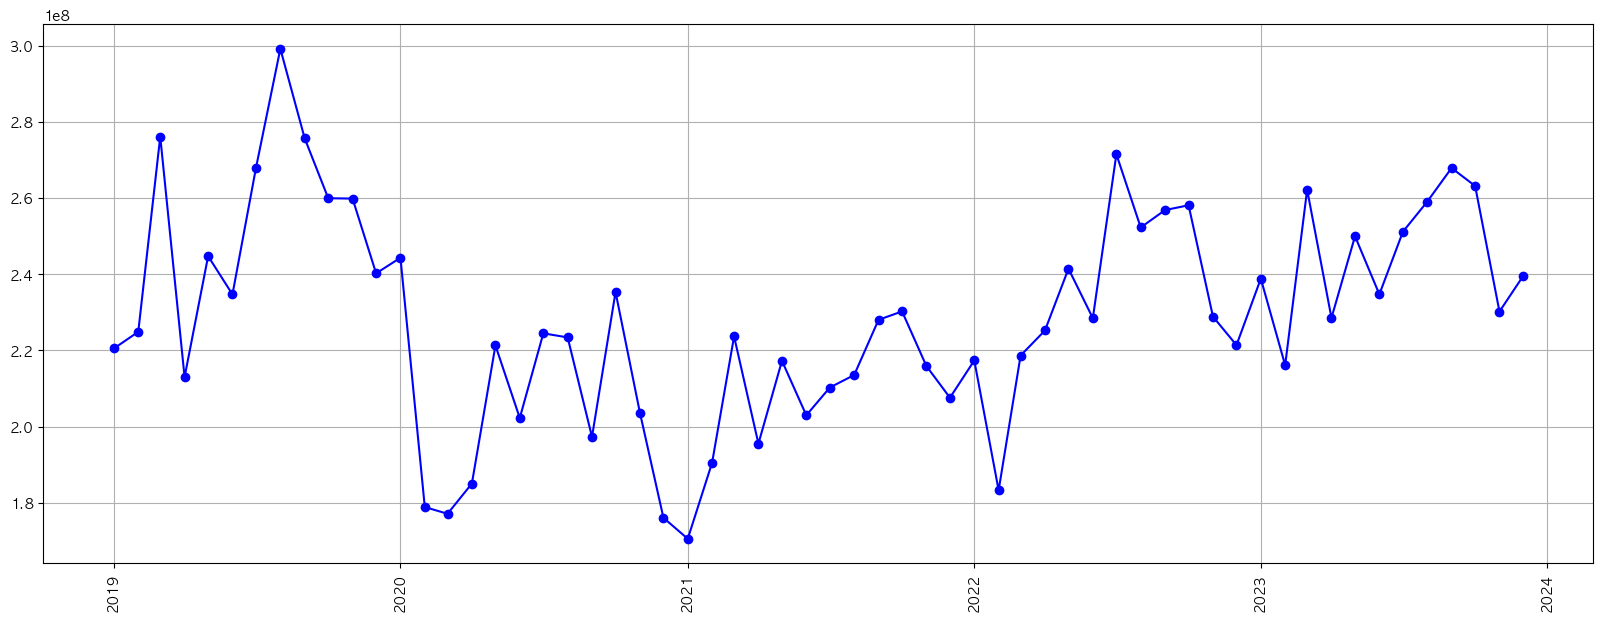

In [14]:
# 전국 방문객수 데이터 시각화
# 기준연월을 기준으로 오름차순 정렬 -> 원래 그래프 그리기 전에 해야됨
whole_df = whole_df.sort_values('기준년월')

plt.figure(figsize=(20, 7))
plt.plot(whole_df['기준년월'], whole_df['방문자수'], marker='o', linestyle='-', color='b')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

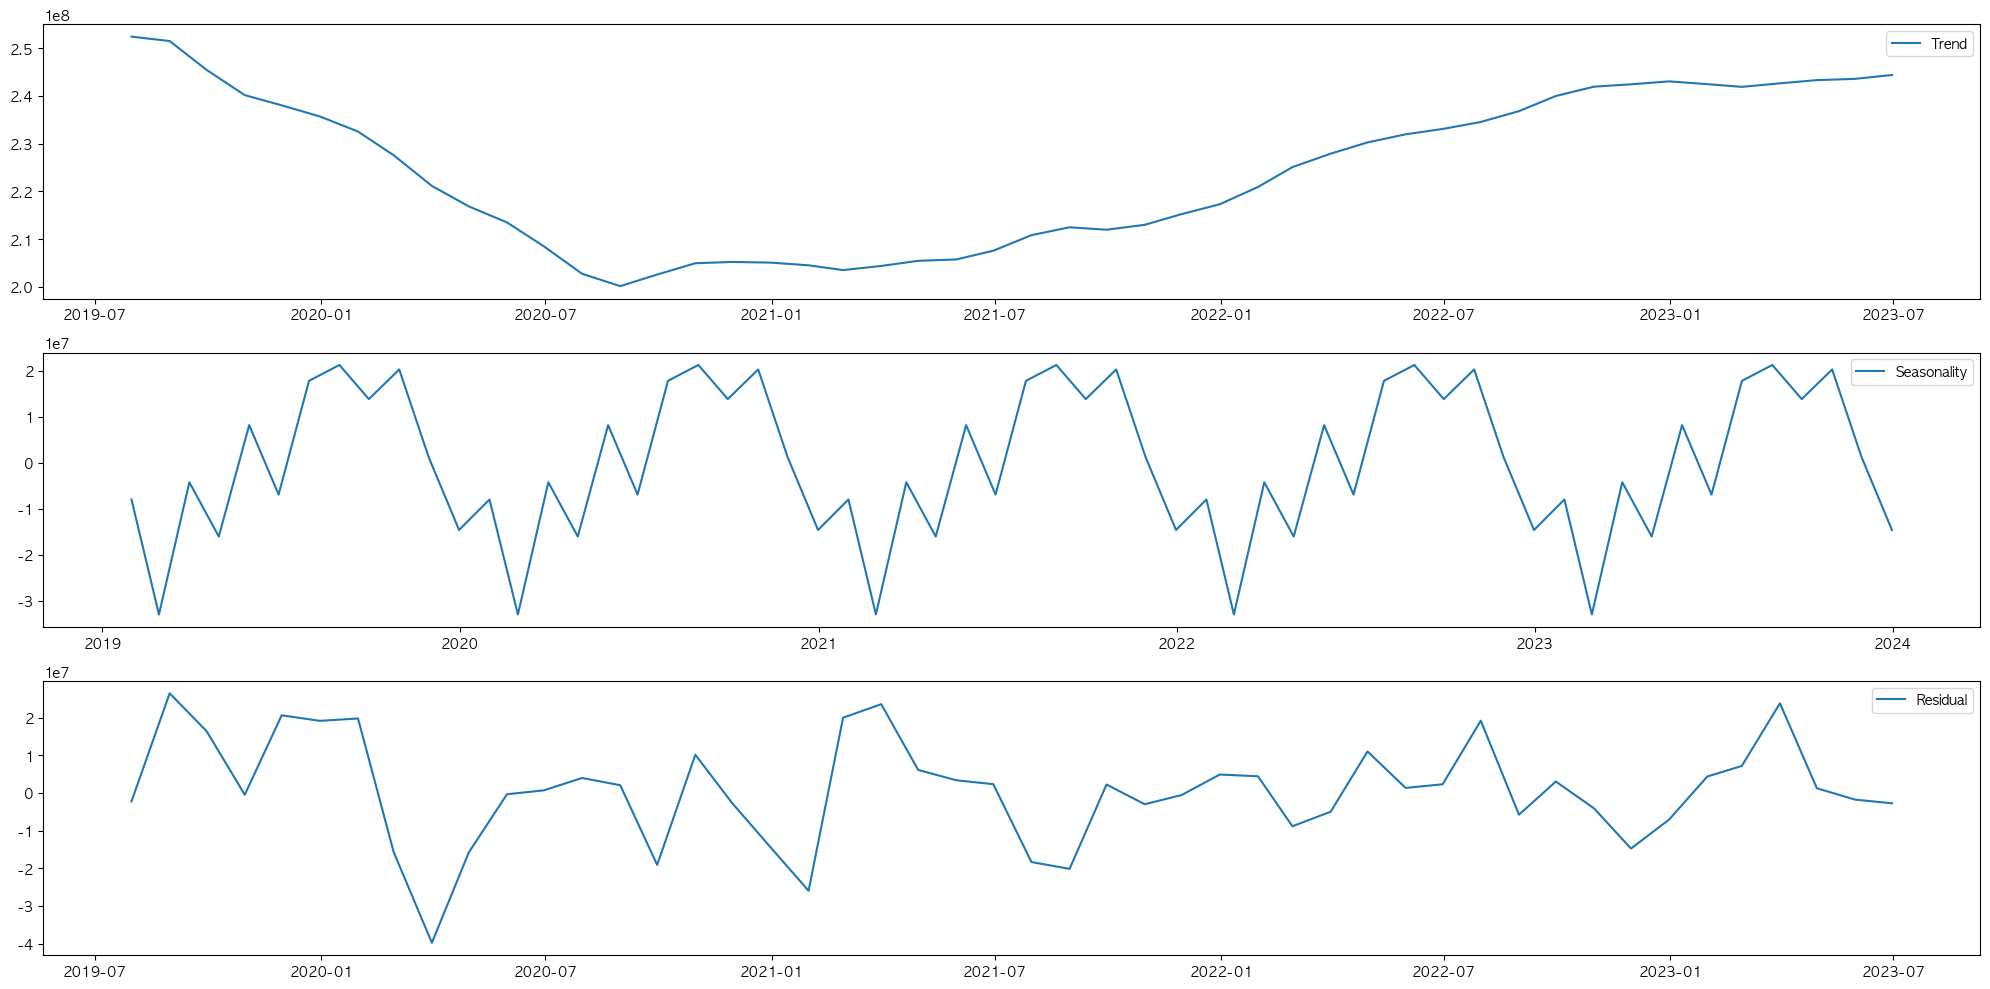

In [41]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = whole_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 10))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 서울 데이터

In [16]:
# 서울 데이터 병합

seoul_df = pd.concat([data for data in data_list['서울']['방문자수']])
seoul_df

seoul_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,50994190.0,48209017.0,5.8
1,2019-02-01,45689903.0,43244984.0,5.6
2,2019-03-01,62763858.0,56836343.0,10.4
3,2019-04-01,45611793.0,45564502.0,0.1
4,2019-05-01,53726633.0,49446437.0,8.6


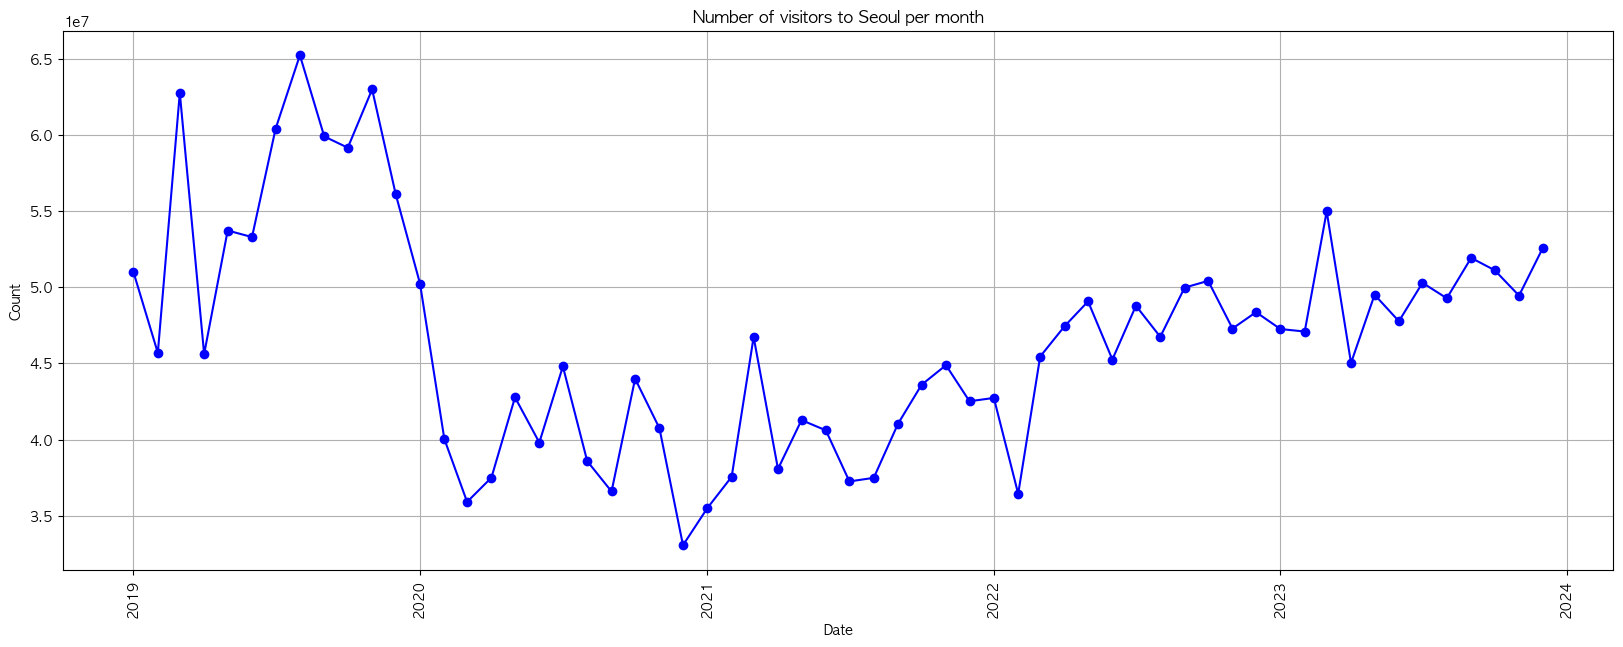

In [17]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
seoul_df = seoul_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Seoul per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

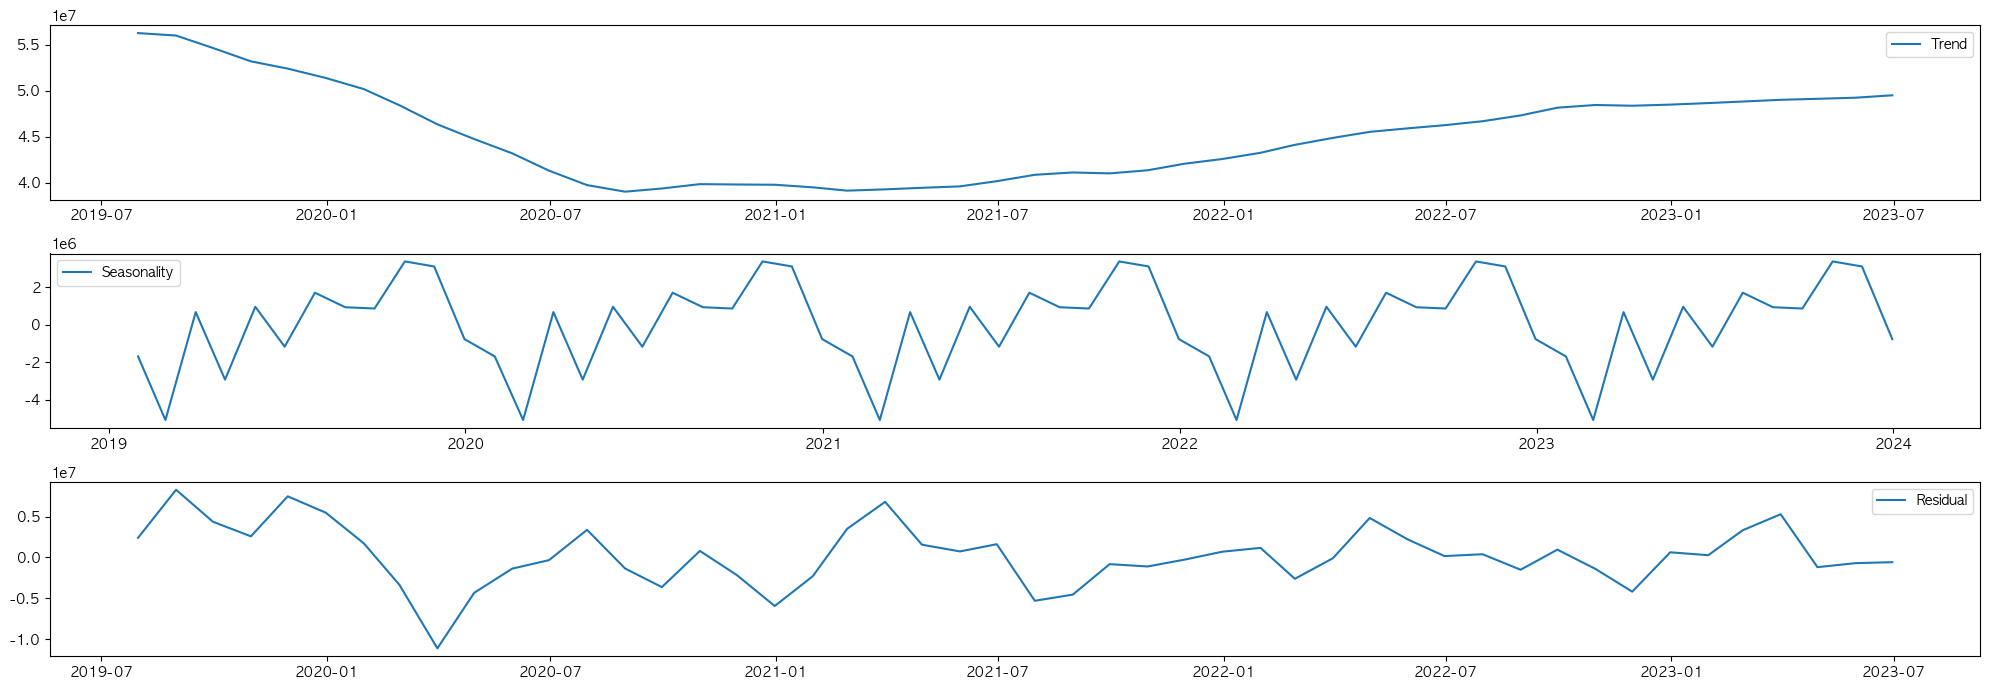

In [18]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = seoul_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 부산 데이터

In [19]:
# 서울 데이터 병합

busan_df = pd.concat([data for data in data_list['부산']['방문자수']])
busan_df

busan_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,11955728.0,11994748.0,-0.3
1,2019-02-01,13173160.0,12522119.0,5.2
2,2019-03-01,14482347.0,13481242.0,7.4
3,2019-04-01,10768786.0,10865458.0,-0.9
4,2019-05-01,13441241.0,12491155.0,7.6


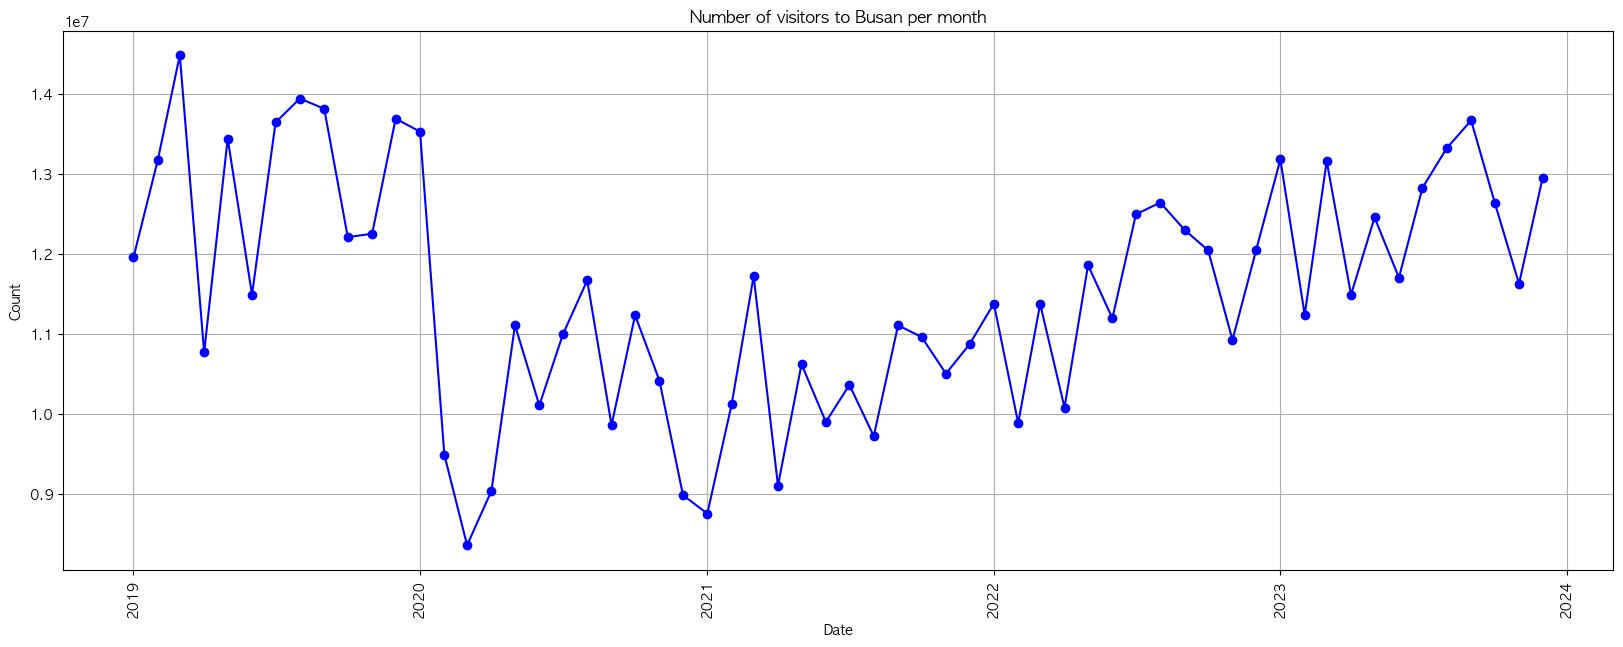

In [20]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
busan_df = busan_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Busan per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

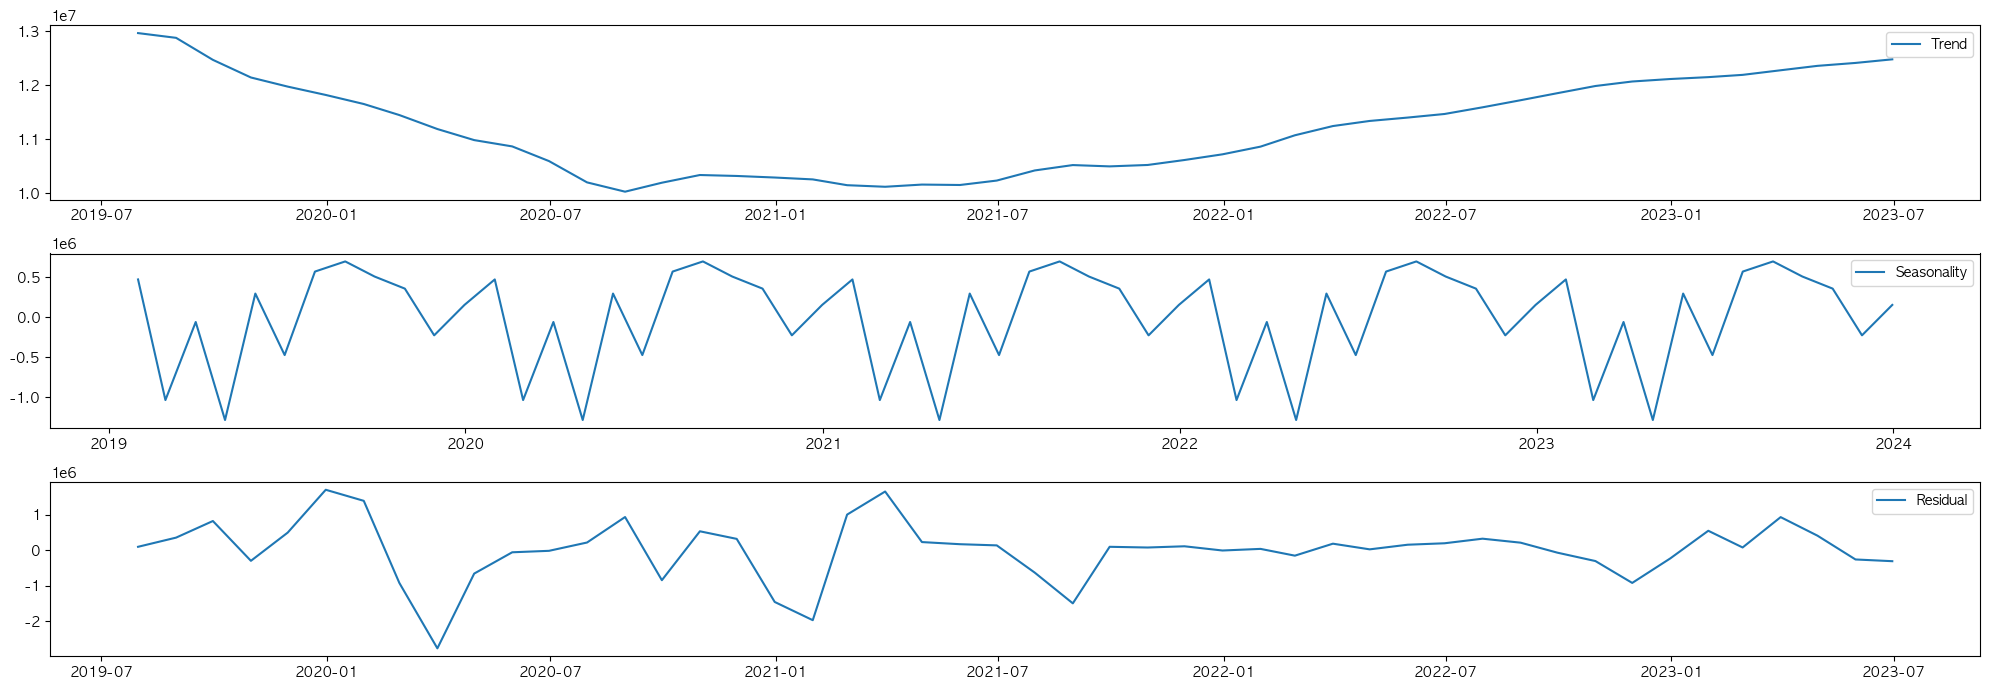

In [21]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = busan_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 대구 데이터

In [42]:
# 대구 데이터 병합

daegu_df = pd.concat([data for data in data_list['대구']['방문자수']])
daegu_df

daegu_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,8527814.0,8446098.0,1.0
1,2019-02-01,9399775.0,8851573.0,6.2
2,2019-03-01,10155206.0,9481876.0,7.1
3,2019-04-01,7892780.0,7891776.0,0.0
4,2019-05-01,8554829.0,8989406.0,-4.8


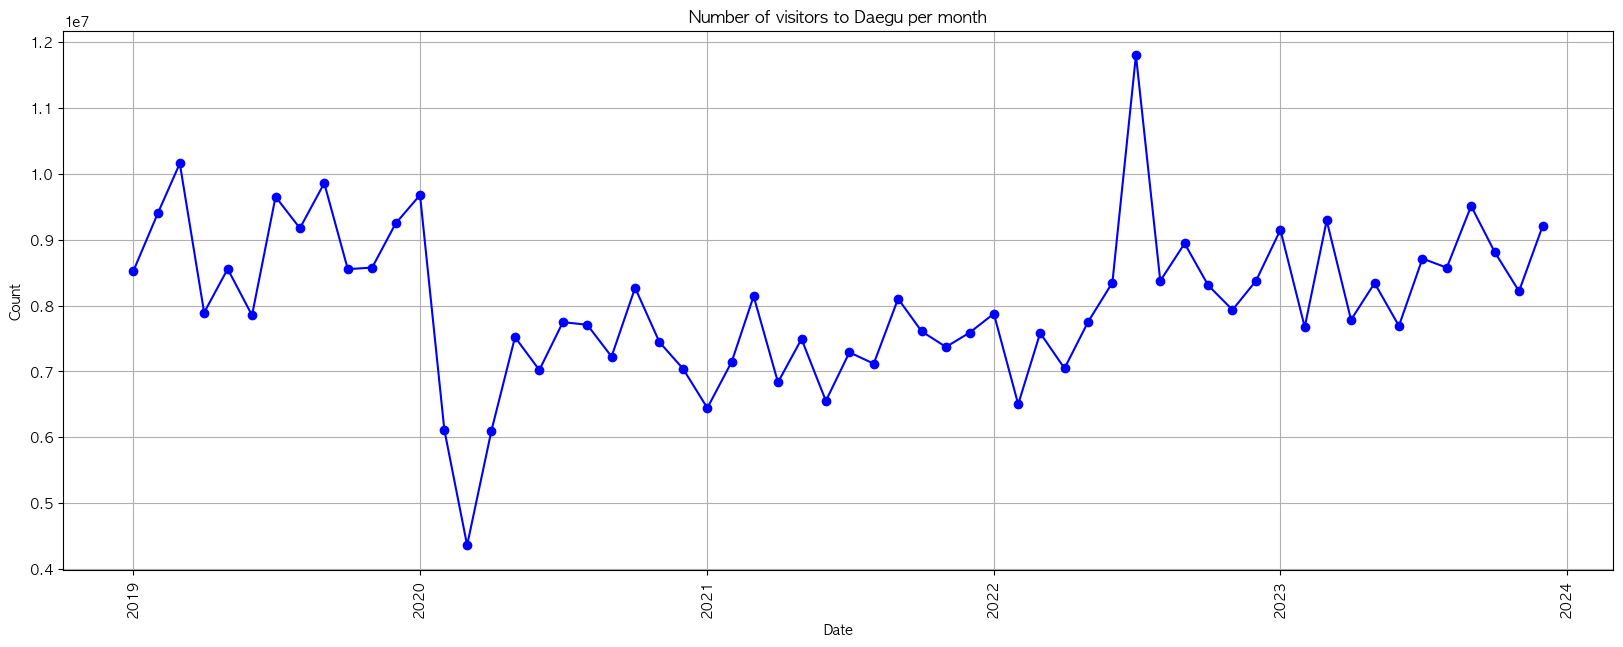

In [44]:
daegu_df = daegu_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Daegu per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

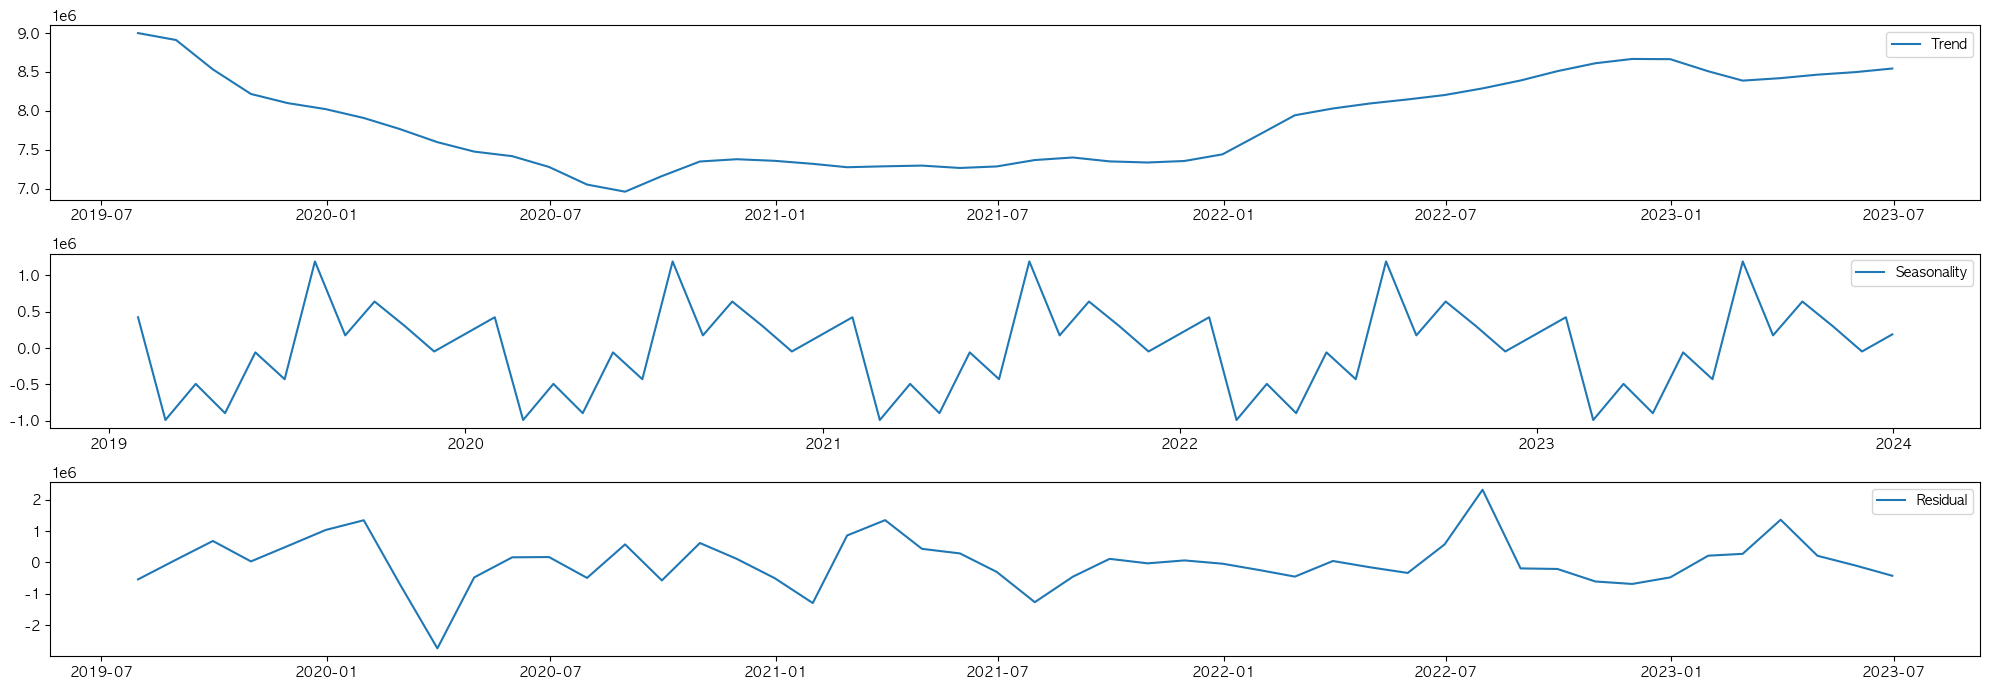

In [47]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = daegu_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 광주 데이터

In [22]:
# 광주 데이터 병합

gwangju_df = pd.concat([data for data in data_list['광주']['방문자수']])
gwangju_df

gwangju_df.head()

,기준년월,방문자수,전년동월방문자수,방문자수증감률
0,2019-01-01,5161078.0,5093921.0,1.3
1,2019-02-01,5548637.0,5343080.0,3.8
2,2019-03-01,6283229.0,5981308.0,5.0
3,2019-04-01,4703227.0,4701654.0,0.0
4,2019-05-01,5194914.0,5320220.0,-2.4


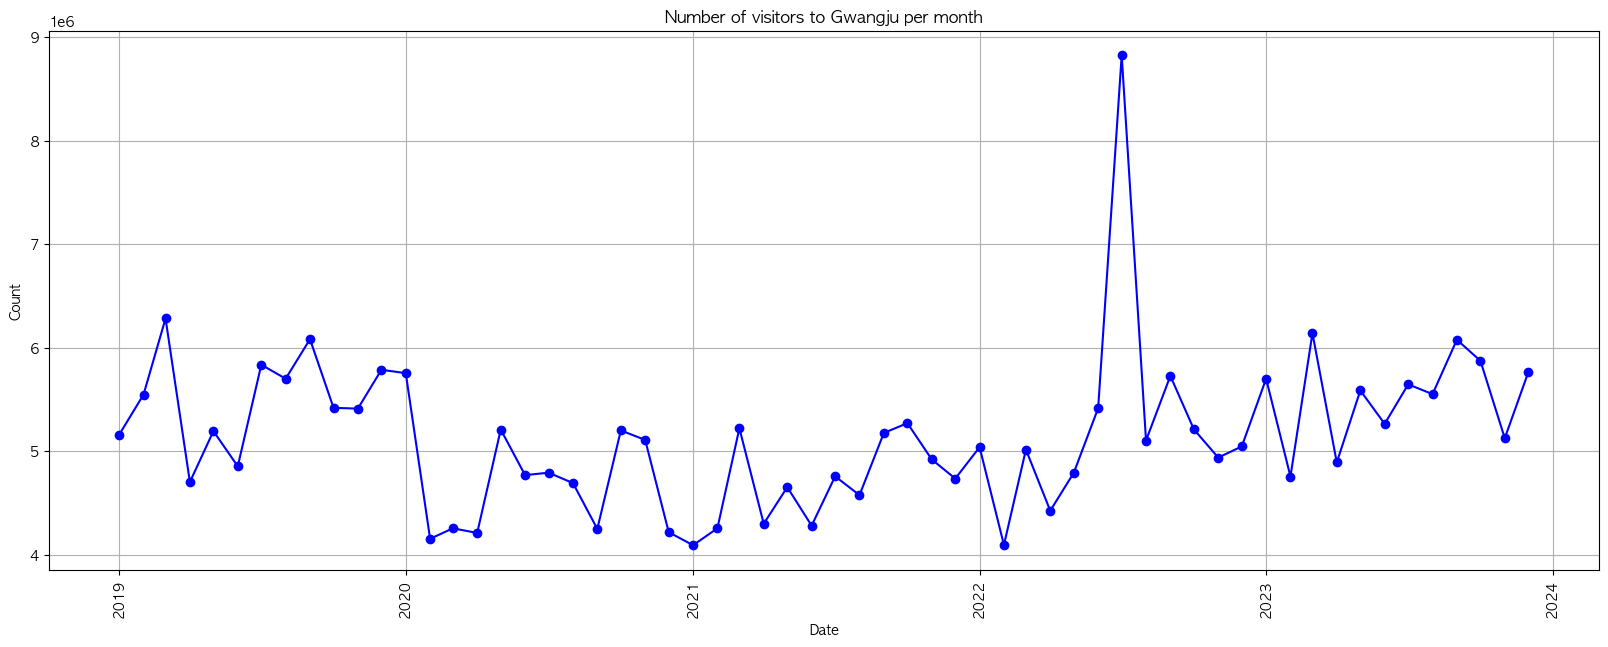

In [23]:
# 위 그래프를 보면 섞여있다. -> 기준년월을 기준으로 정렬
gwangju_df = gwangju_df.sort_values(['기준년월'])

plt.figure(figsize=(20, 7))
plt.plot(gwangju_df['기준년월'], gwangju_df['방문자수'], marker='o', linestyle='-', color='b')
plt.title('Number of visitors to Gwangju per month')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

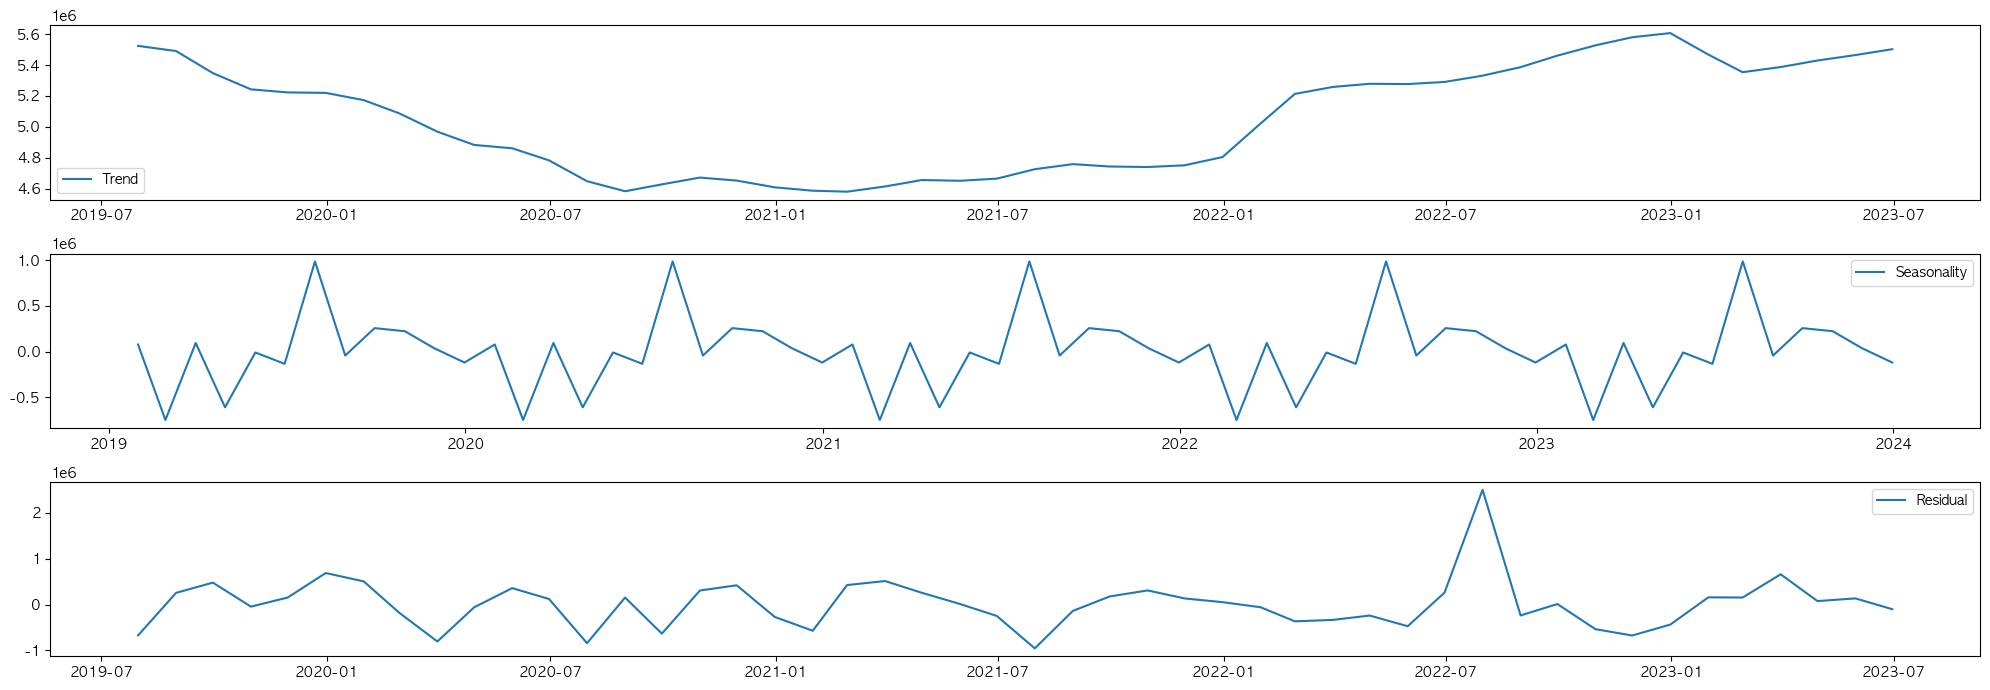

In [24]:
# 계절성 확인
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 세팅
# 인덱스로 '기준연도' 설정, 빈도 일별('M')로 설정
ts_data = gwangju_df.set_index('기준년월').resample('M').mean().interpolate()

# 시계열 분해 수행
# 데이터를 트렌드, 계절성, 잔차로 분해
decomposition = seasonal_decompose(ts_data['방문자수'], model='additive')

plt.figure(figsize=(20, 7))

# 트렌드
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.tight_layout()

# 계절성
plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

# 잔차(Residual)
plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='best')
plt.tight_layout()

plt.show()

## 전국, 서울, 부산, 광주 데이터

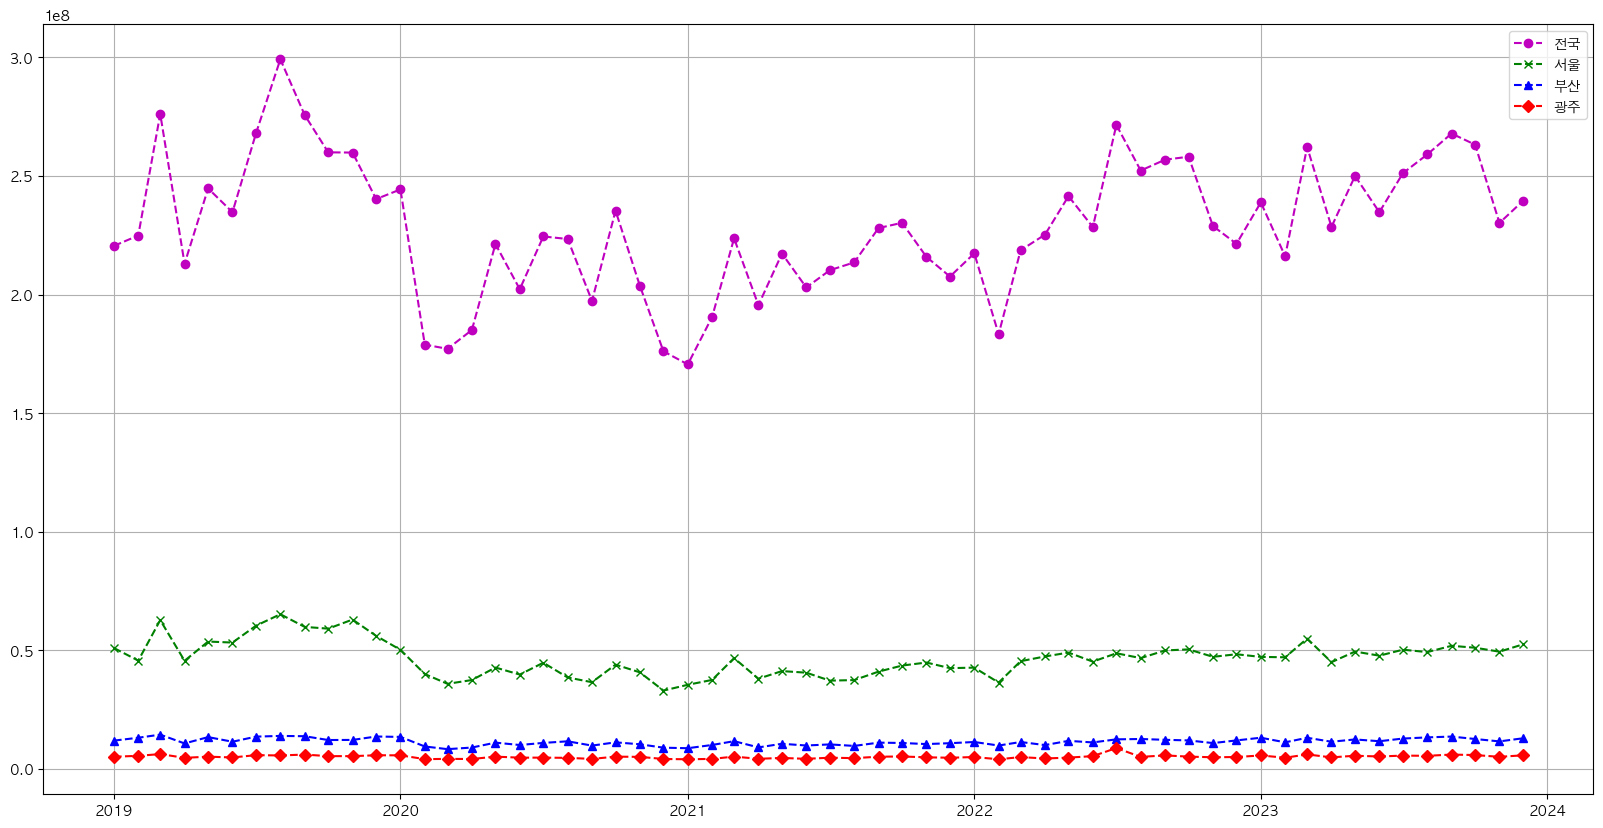

In [25]:
plt.figure(figsize=(20, 10))
plt.plot(whole_df['기준년월'], whole_df['방문자수'], marker='o', linestyle='--', color='m', label='전국')
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='x', linestyle='--', color='g', label='서울')
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='^', linestyle='--', color='b', label='부산')
plt.plot(gwangju_df['기준년월'], gwangju_df['방문자수'], marker='D', linestyle='--', color='r', label='광주')
plt.legend()
plt.grid(True)
plt.show()

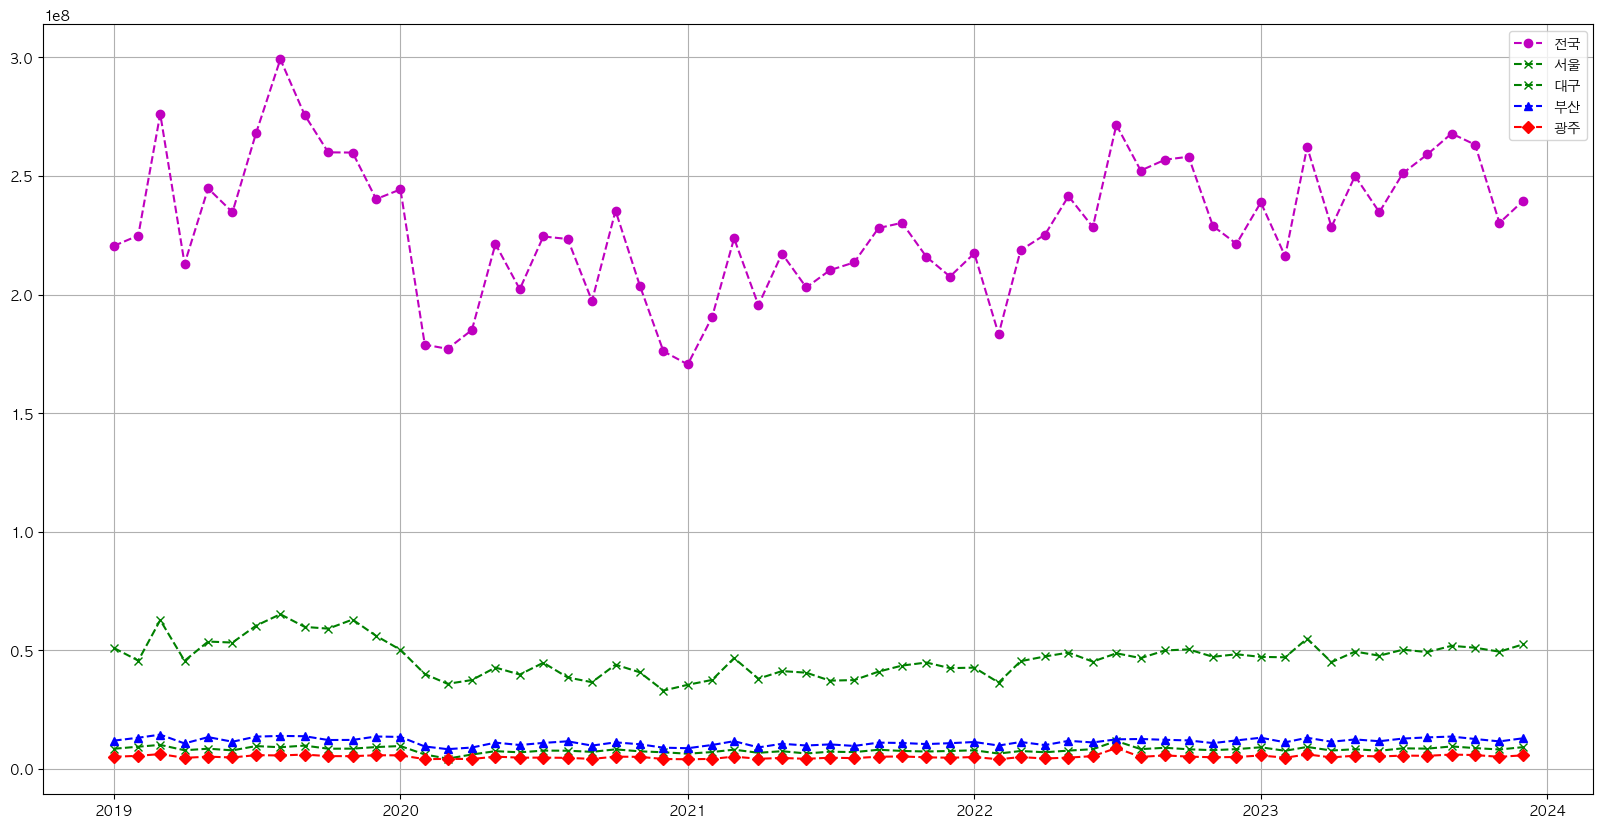

In [48]:
plt.figure(figsize=(20, 10))
plt.plot(whole_df['기준년월'], whole_df['방문자수'], marker='o', linestyle='--', color='m', label='전국')
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='x', linestyle='--', color='g', label='서울')
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='x', linestyle='--', color='g', label='대구')
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='^', linestyle='--', color='b', label='부산')
plt.plot(gwangju_df['기준년월'], gwangju_df['방문자수'], marker='D', linestyle='--', color='r', label='광주')
plt.legend()
plt.grid(True)
plt.show()

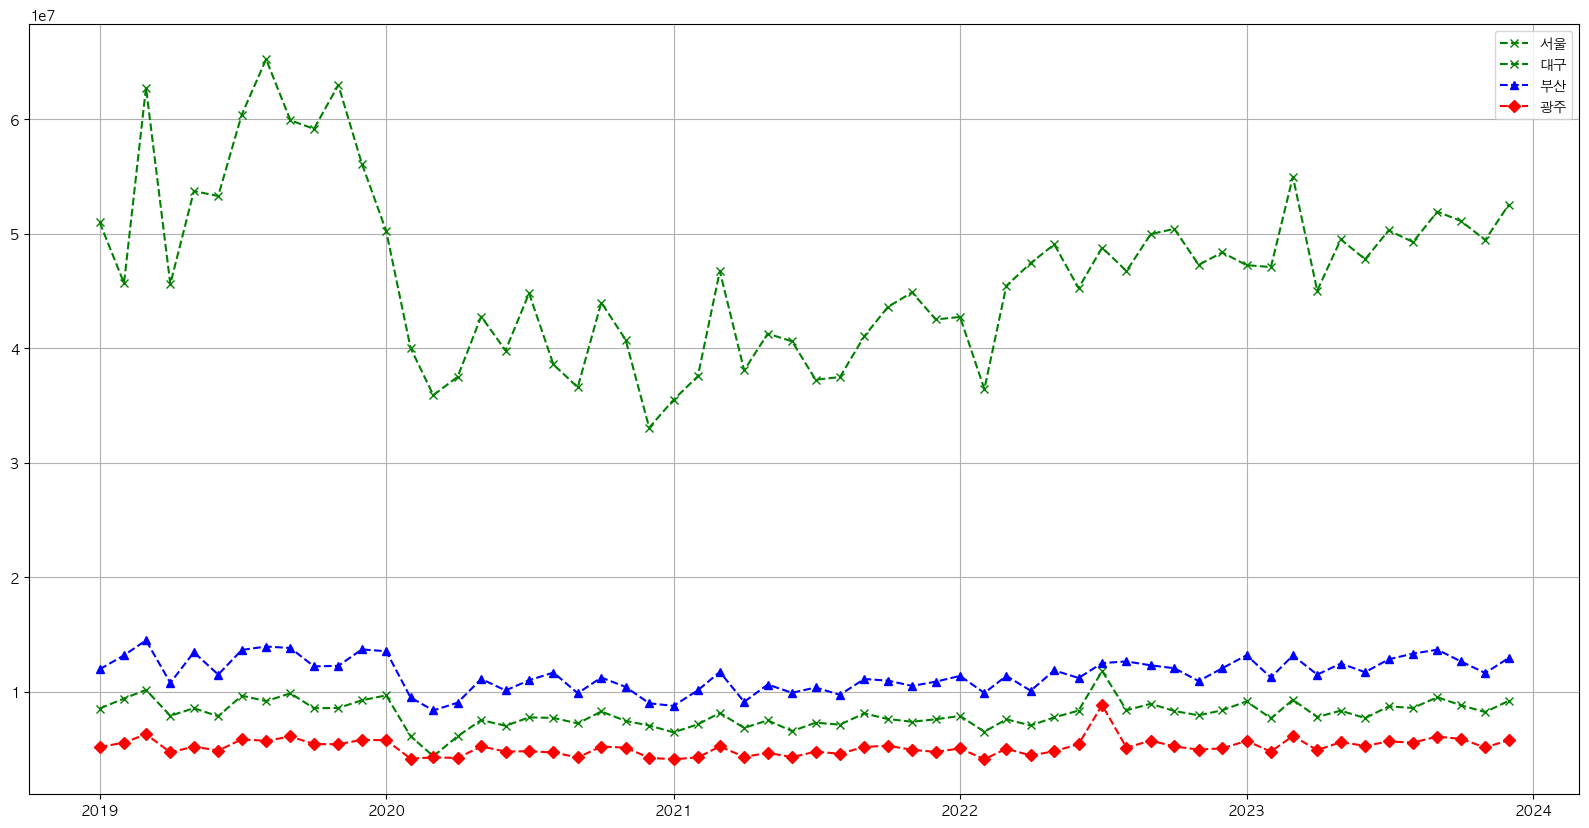

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(seoul_df['기준년월'], seoul_df['방문자수'], marker='x', linestyle='--', color='g', label='서울')
plt.plot(daegu_df['기준년월'], daegu_df['방문자수'], marker='x', linestyle='--', color='g', label='대구')
plt.plot(busan_df['기준년월'], busan_df['방문자수'], marker='^', linestyle='--', color='b', label='부산')
plt.plot(gwangju_df['기준년월'], gwangju_df['방문자수'], marker='D', linestyle='--', color='r', label='광주')
plt.legend()
plt.grid(True)
plt.show()

# 방문자 거주지

In [29]:
# 광역지자체명 확인
tmp = data_list['세종']['거주지'][0]
tmp['광역지자체명'].unique()

array(['대전광역시', '충청북도', '충청남도', '경기도', '서울특별시', '전북특별자치도', '인천광역시',
       '경상북도', '경상남도', '대구광역시', '부산광역시', '전라남도', '광주광역시', '강원특별자치도',
       '울산광역시', '제주특별자치도'], dtype=object)

In [34]:
tmp2 = data_list['세종']['거주지'][0]
tmp2['광역지자체명'].unique()

array(['대전광역시', '충청북도', '충청남도', '경기도', '서울특별시', '전북특별자치도', '인천광역시',
       '경상북도', '경상남도', '대구광역시', '부산광역시', '전라남도', '광주광역시', '강원특별자치도',
       '울산광역시', '제주특별자치도'], dtype=object)

In [35]:
tmp3 = data_list['세종']['거주지'][0]
tmp3['광역지자체명'].unique()

array(['대전광역시', '충청북도', '충청남도', '경기도', '서울특별시', '전북특별자치도', '인천광역시',
       '경상북도', '경상남도', '대구광역시', '부산광역시', '전라남도', '광주광역시', '강원특별자치도',
       '울산광역시', '제주특별자치도'], dtype=object)

In [36]:
tmp4 = data_list['세종']['거주지'][0]
tmp4['광역지자체명'].unique()

array(['대전광역시', '충청북도', '충청남도', '경기도', '서울특별시', '전북특별자치도', '인천광역시',
       '경상북도', '경상남도', '대구광역시', '부산광역시', '전라남도', '광주광역시', '강원특별자치도',
       '울산광역시', '제주특별자치도'], dtype=object)